# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [49]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [19]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_description = city_weather["weather"][0]["description"]
        city_country = city_weather["sys"]["country"]

        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Country": city_country,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Current Description": city_description,})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | arraial do cabo
Processing Record 3 of Set 1 | dauphin
Processing Record 4 of Set 1 | dong hoi
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | panama city
Processing Record 7 of Set 1 | severo-kurilsk
Processing Record 8 of Set 1 | fairbanks
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | santa ines
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | lichuan
Processing Record 13 of Set 1 | portland
Processing Record 14 of Set 1 | san quintin
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 19 of Set 1 | eresos
Processing Record 20 of Set 1 | tuatapere
Processing Record 21 of Set 1 | paamiut
Processing Record 22 of S

Processing Record 38 of Set 4 | dolbeau
City not found. Skipping...
Processing Record 39 of Set 4 | fort saint john
City not found. Skipping...
Processing Record 40 of Set 4 | lasem
Processing Record 41 of Set 4 | wodonga
Processing Record 42 of Set 4 | saskylakh
Processing Record 43 of Set 4 | bonavista
Processing Record 44 of Set 4 | nizhniye sergi
Processing Record 45 of Set 4 | port blair
Processing Record 46 of Set 4 | klaksvik
Processing Record 47 of Set 4 | igarka
Processing Record 48 of Set 4 | faya
Processing Record 49 of Set 4 | bathsheba
Processing Record 50 of Set 4 | santa maria
Processing Record 1 of Set 5 | fortuna foothills
Processing Record 2 of Set 5 | vila franca do campo
Processing Record 3 of Set 5 | union
Processing Record 4 of Set 5 | mineros
Processing Record 5 of Set 5 | batouri
Processing Record 6 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 7 of Set 5 | utiroa
City not found. Skipping...
Processing Record 8 of Set 5 | airai
Processing Reco

Processing Record 26 of Set 8 | gondomar
Processing Record 27 of Set 8 | port hedland
Processing Record 28 of Set 8 | chuy
Processing Record 29 of Set 8 | portoferraio
Processing Record 30 of Set 8 | kibre mengist
Processing Record 31 of Set 8 | mingaora
Processing Record 32 of Set 8 | amos
Processing Record 33 of Set 8 | tual
Processing Record 34 of Set 8 | serpa
Processing Record 35 of Set 8 | vardo
Processing Record 36 of Set 8 | moctezuma
Processing Record 37 of Set 8 | peace river
Processing Record 38 of Set 8 | kilindoni
Processing Record 39 of Set 8 | ishlei
City not found. Skipping...
Processing Record 40 of Set 8 | axim
Processing Record 41 of Set 8 | kuching
Processing Record 42 of Set 8 | xai-xai
Processing Record 43 of Set 8 | tiarei
Processing Record 44 of Set 8 | maravilha
Processing Record 45 of Set 8 | fonte boa
Processing Record 46 of Set 8 | banmo
City not found. Skipping...
Processing Record 47 of Set 8 | urumqi
Processing Record 48 of Set 8 | bukachacha
Processing R

Processing Record 16 of Set 12 | acapulco
Processing Record 17 of Set 12 | kommunar
Processing Record 18 of Set 12 | marzuq
Processing Record 19 of Set 12 | tilichiki
Processing Record 20 of Set 12 | mbandaka
Processing Record 21 of Set 12 | ludvika
Processing Record 22 of Set 12 | vidyayevo
Processing Record 23 of Set 12 | xinqing
Processing Record 24 of Set 12 | sorada
Processing Record 25 of Set 12 | linden
Processing Record 26 of Set 12 | durazno
Processing Record 27 of Set 12 | ramnagar
Processing Record 28 of Set 12 | steamboat springs
Processing Record 29 of Set 12 | redmond
Processing Record 30 of Set 12 | pleszew
Processing Record 31 of Set 12 | camana
Processing Record 32 of Set 12 | pedernales
Processing Record 33 of Set 12 | ponta delgada
Processing Record 34 of Set 12 | grand centre
City not found. Skipping...
Processing Record 35 of Set 12 | cizre
Processing Record 36 of Set 12 | chibuto
Processing Record 37 of Set 12 | herzberg
Processing Record 38 of Set 12 | krasnoselk

## len(city_data)


In [20]:
len(city_data)

576

In [79]:

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description
0,Punta Arenas,CL,-53.1500,-70.9167,42.91,75,20,19.57,few clouds
1,Arraial Do Cabo,BR,-22.9661,-42.0278,72.90,89,100,28.50,overcast clouds
2,Dauphin,CA,51.1494,-100.0502,23.14,80,100,18.41,overcast clouds
3,Dong Hoi,VN,17.4833,106.6000,71.53,93,100,19.80,overcast clouds
4,Cape Town,ZA,-33.9258,18.4232,62.28,65,0,12.66,clear sky
5,Panama City,PA,8.9936,-79.5197,79.14,78,20,4.61,few clouds
6,Severo-Kurilsk,RU,50.6789,156.1250,22.96,89,93,34.16,snow
7,Fairbanks,US,64.8378,-147.7164,14.09,86,40,4.61,mist
8,Albany,US,42.6001,-73.9662,31.23,77,1,4.34,clear sky
9,Santa Ines,BR,-3.6667,-45.3800,74.17,90,87,4.09,overcast clouds


In [84]:
# Create the output file (CSV).
output_data_file = "output_data/Cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")
# Display sample data
city_data_df.head()


,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description
0,Punta Arenas,CL,-53.1500,-70.9167,42.91,75,20,19.57,few clouds
1,Arraial Do Cabo,BR,-22.9661,-42.0278,72.90,89,100,28.50,overcast clouds
2,Dauphin,CA,51.1494,-100.0502,23.14,80,100,18.41,overcast clouds
3,Dong Hoi,VN,17.4833,106.6000,71.53,93,100,19.80,overcast clouds
4,Cape Town,ZA,-33.9258,18.4232,62.28,65,0,12.66,clear sky


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

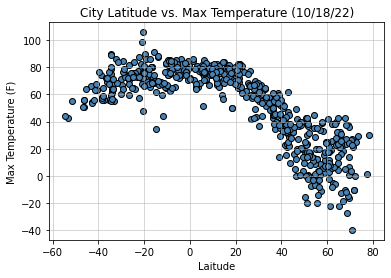

In [41]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (10/18/22)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

plt.savefig("output_data/Fig1.png")


#### Latitude Vs. Humidity

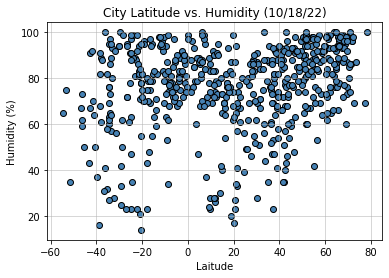

In [42]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (10/18/22)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("output_data/Fig2.png")


#### Latitude Vs. Cloudiness

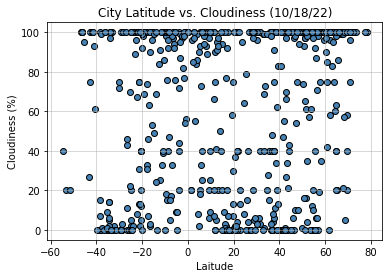

In [43]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (10/18/22)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("output_data/Fig3.png")



#### Latitude vs. Wind Speed Plot

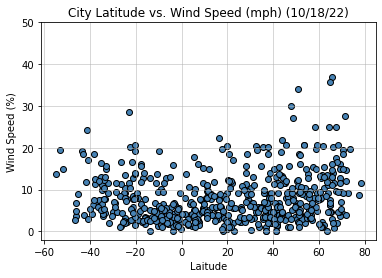

In [45]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (10/18/22)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("output_data/Fig4.png")


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [57]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemisphere.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description
2,Dauphin,CA,51.1494,-100.0502,23.14,80,100,18.41,overcast clouds
3,Dong Hoi,VN,17.4833,106.6000,71.53,93,100,19.80,overcast clouds
5,Panama City,PA,8.9936,-79.5197,79.14,78,20,4.61,few clouds
6,Severo-Kurilsk,RU,50.6789,156.1250,22.96,89,93,34.16,snow
7,Fairbanks,US,64.8378,-147.7164,14.09,86,40,4.61,mist


In [58]:
southern_hemisphere = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemisphere.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description
0,Punta Arenas,CL,-53.1500,-70.9167,42.91,75,20,19.57,few clouds
1,Arraial Do Cabo,BR,-22.9661,-42.0278,72.90,89,100,28.50,overcast clouds
4,Cape Town,ZA,-33.9258,18.4232,62.28,65,0,12.66,clear sky
9,Santa Ines,BR,-3.6667,-45.3800,74.17,90,87,4.09,overcast clouds
10,Atuona,PF,-9.8000,-139.0333,77.61,79,18,19.28,light rain


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8615633386175359


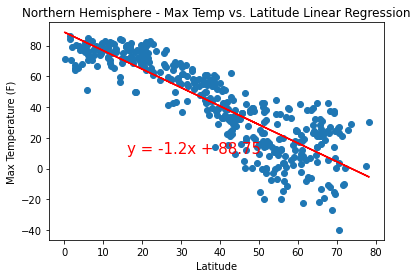

In [69]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression: 
x_values = pd.to_numeric(northern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemisphere['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 1: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The r-value is: {rvalue}")

plt.show() 


The r-value is: 0.4952272073239979


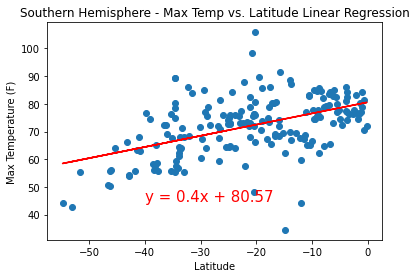

In [70]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression:
x_values = pd.to_numeric(southern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemisphere['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 2: Southern Hemisphere - Max Temp vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,45),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The r-value is: {rvalue}")

plt.show()

**Discussion about the linear relationship:** 

The linear regression is modeling what happens to temperature as latitudes increase in the northern and southern hemispheres. Which means that for the northern hemisphere as latitude increases you move further away from the equator. And in the southern hemisphere latitudes decrease as we move away from the equator. For the northern hemisphere there is a negative correlation between latitude and maximum temperature and southern hemisphere there is a positive correlation between latitude and maximum temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.30523438952193116


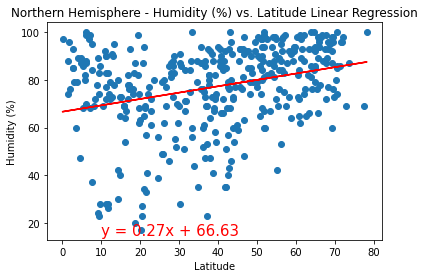

In [71]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = pd.to_numeric(northern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemisphere['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 3: Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The r-value is: {rvalue}")

plt.show() 


The r-value is: 0.28334746404645783


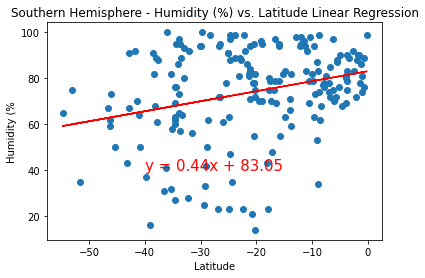

In [72]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = pd.to_numeric(southern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemisphere['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 4: Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The r-value is: {rvalue}")

plt.show()


**Discussion about the linear relationship:** 

The linear regression is modeling what happens to humidity as latitude increases in the northern and southern hemispheres. As latitude increases for the northern hemisphere we move further away from the equator, and as latitude increases for the southern hemisphere we move closer to the equator.

As latitude increases in the northern hemisphere so does humidity, which means there is a positive correlation. There is no significant correlation between latitudes and humidity in the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.23999083317081446


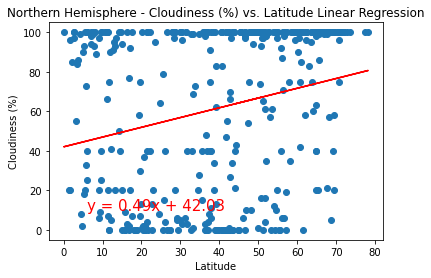

In [75]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = pd.to_numeric(northern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemisphere['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 5: Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The r-value is: {rvalue}")

plt.show() 


The r-value is: 0.24976198850483614


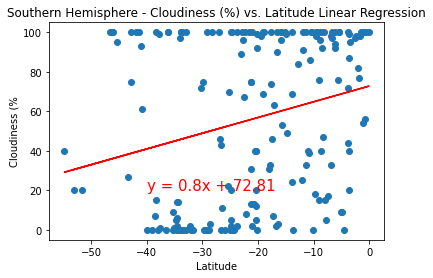

In [76]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression:
x_values = pd.to_numeric(southern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemisphere['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 6: Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The r-value is: {rvalue}")

plt.show()


**Discussion about the linear relationship:** 
The linear regression is modeling what happens to cloudiness as latitudes increase in the northern and southern hemispheres. As latitude increases for the northern hemisphere we move further away from the equator, and as latitude increases for the southern hemisphere we move closer to the equator. For the northern hemisphere, increases in latitude appear to be weakly related to increases in cloudiness, but there is significant positive relationship/correlation. On the other hand, there is no relationship between latitude and cloudiness in the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.25509340257307944


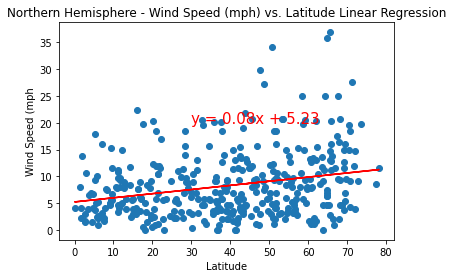

In [77]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression:
x_values = pd.to_numeric(northern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemisphere['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 7: Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The r-value is: {rvalue}")

plt.show() 


The r-value is: -0.3545946841308264


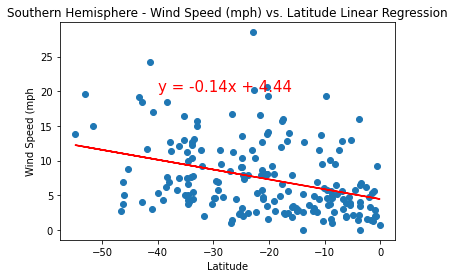

In [78]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression: 
x_values = pd.to_numeric(southern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemisphere['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 8: Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The r-value is: {rvalue}")

plt.show() 


**Discussion about the linear relationship:** 


The linear regression is modeling what happens to wind speed as latitudes increase in the northern and southern hemispheres. As latitude increases for the northern hemisphere we move further away from the equator, and as latitude increases for the southern hemisphere we move closer to the equator. In the northern hemisphere, although the relationship between increasing latitude and wind speed is significant (based on the p-value), there only appears to be a weak correlation. On the other hand, in the southern hemisphere there is no correlation between the increasing latitude and wind speed.